In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data= pd.read_csv('./train_v9rqX0R.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode(),inplace=True)

In [6]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
import category_encoders as ce
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)

In [8]:
train_data.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_LF                  int64
Item_Fat_Content_reg                 int64
Item_Visibility                    float64
Item_Type_Dairy                      int64
Item_Type_Soft Drinks                int64
Item_Type_Meat                       int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Household                  int64
Item_Type_Baking Goods               int64
Item_Type_Snack Foods                int64
Item_Type_Frozen Foods               int64
Item_Type_Breakfast                  int64
Item_Type_Health and Hygiene         int64
Item_Type_Hard Drinks                int64
Item_Type_Canned                     int64
Item_Type_Breads                     int64
Item_Type_Starchy Foods              int64
Item_Type_Others                     int64
Item_Type_S

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

train_data.Item_MRP= scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [10]:
print(train_data.Item_MRP)

0       1.747454
1      -1.489023
2       0.010040
3       0.660050
4      -1.399220
          ...   
8518    1.180783
8519   -0.527301
8520   -0.897208
8521   -0.607977
8522   -1.052261
Name: Item_MRP, Length: 8523, dtype: float64


In [11]:
train_data.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_LF                  int64
Item_Fat_Content_reg                 int64
Item_Visibility                    float64
Item_Type_Dairy                      int64
Item_Type_Soft Drinks                int64
Item_Type_Meat                       int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Household                  int64
Item_Type_Baking Goods               int64
Item_Type_Snack Foods                int64
Item_Type_Frozen Foods               int64
Item_Type_Breakfast                  int64
Item_Type_Health and Hygiene         int64
Item_Type_Hard Drinks                int64
Item_Type_Canned                     int64
Item_Type_Breads                     int64
Item_Type_Starchy Foods              int64
Item_Type_Others                     int64
Item_Type_S

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_X = train_data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

train_Y = train_data['Item_Outlet_Sales']

train_x,test_x,train_y,test_y= train_test_split(train_X,train_Y,test_size=0.2,random_state=0)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((6818, 46), (6818,), (1705, 46), (1705,))

In [13]:
model_LR= LinearRegression()

model_LR.fit(train_x,train_y)

predict_train=model_LR.predict(train_x)
predict_test=model_LR.predict(test_x)

print('RMSE on train',mean_squared_error(train_y,predict_train)**(0.5))
print('RMSE on test',mean_squared_error(test_y,predict_test)**(0.5))

RMSE on train 1125.998391717315
RMSE on test 1132.739012783331


In [14]:
model_RF= RandomForestRegressor(max_depth=10)

model_RF.fit(train_x,train_y)
predict_train= model_RF.predict(train_x)
predict_test= model_RF.predict(test_x)

print('RMSE on train', mean_squared_error(train_y,predict_train)**(0.5))
print('RMSE on test', mean_squared_error(test_y,predict_test)**(0.5))

RMSE on train 908.4688791993618
RMSE on test 1099.4058126215448


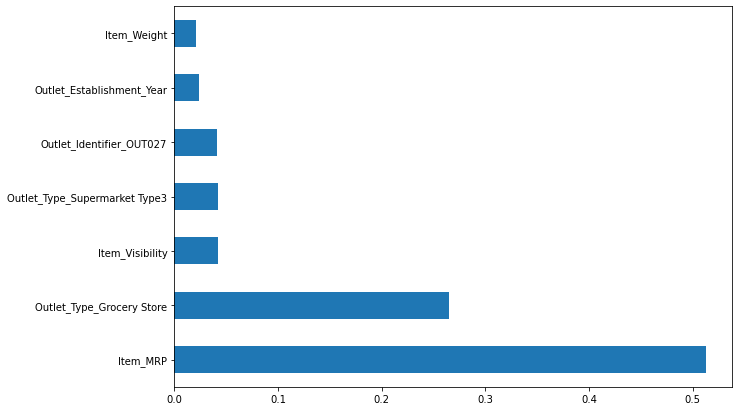

In [15]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RF.feature_importances_,index=train_x.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [16]:
train_x_fi=train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
test_x_fi=test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
model_RF_fi=RandomForestRegressor(max_depth=10)
model_RF_fi.fit(train_x_fi,train_y)
predict_train_fi=model_RF_fi.predict(train_x_fi)
predict_test_fi=model_RF_fi.predict(test_x_fi)

print('RMSE on train', mean_squared_error(train_y,predict_train_fi)**(0.5))
print('RMSE on test', mean_squared_error(test_y,predict_test_fi)**(0.5))

RMSE on train 913.6171058222976
RMSE on test 1099.0200802780398


This was basic analysis and now we use pipeline to predict the model based on previos learning but from the beginig.

In [17]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

data= pd.read_csv('./train_v9rqX0R.csv')

print(data.head(5))

train_x= data.drop(columns=['Item_Outlet_Sales'])
train_y=data['Item_Outlet_Sales']

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [18]:
from sklearn.base import BaseEstimator

class OutletTypeEncoder(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,documents,y=None):
        return self
    def transform(self,x_dataset):
        x_dataset['outlet_grocery_store']=(x_dataset['Outlet_Type']=='Grocery Store')*1
        x_dataset['outlet_supermarket_3']=(x_dataset['Outlet_Type']=='Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027']=(x_dataset['Outlet_Identifier']=='OUT027')*1
        
        return x_dataset
    

In [23]:
pre_process= ColumnTransformer(remainder='passthrough',
                              transformers=[('drop_columns','drop',['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type']),
                                           ('impute_item_weight',SimpleImputer(strategy='mean'),['Item_Weight'])
                                           ,('scale_data',StandardScaler(),['Item_MRP'])])

In [24]:
model_pipeline=Pipeline(steps=[('get_outlet_binary_columns',OutletTypeEncoder()),
                               ('pre_processing',pre_process),
                               ('random_forest',RandomForestRegressor(max_depth=10,random_state=2))])

model_pipeline.fit(train_x,train_y)

model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

In [25]:
test_data= pd.read_csv('./test_AbJTz2l.csv')

model_pipeline.predict(test_data)

array([1646.0548363 , 1305.4298012 ,  649.26184297, ..., 1848.60226305,
       3959.67937864, 1384.01466986])